# 5. Bond Mechanics

In [6]:
import interest
import numpy as np
from scipy import optimize
import math

par_values = [0.035,0.042,0.047,0.048,0.056,0.072,0.074,0.078,0.08],[0.5,1,2,3,5,7,10,20,30]
def rates_times(n):
    t = 0.5
    timeList = []
    drateList = []
    while t <= n:
        timeList.append(t)
        drateList.append(interest.zcb(t, par_values))
        t = t + 0.5

    return np.array(drateList), np.array(timeList)

# Price of a 2-yr Bond

In [130]:
maturity = 2
frequency = 2
num_cfs = maturity * frequency
payment_timesA = np.linspace(start=1/frequency, stop=maturity, num=num_cfs)
payment_timesA

array([0.5, 1. , 1.5, 2. ])

In [131]:
c = 0.053
cfsA = np.ones(num_cfs) * c / frequency
cfsA[-1] += 1
cfsA

array([0.0265, 0.0265, 0.0265, 1.0265])

In [132]:
par_ratesA, tenorA = rates_times(2)
discountA = interest.bootstrap(par_ratesA,tenorA)
discountA

(array([0.98280098, 0.95921761, 0.93596487, 0.91095983]),
 array([0.5, 1. , 1.5, 2. ]))

In [133]:
priceA = cfsA @ discountA[0]
priceA

1.0113668298789493

# Price of a 25-yr bond

In [134]:
maturity = 25
frequency = 2
num_cfs = maturity * frequency
payment_timesB = np.linspace(start=1/frequency, stop=maturity, num=num_cfs)
payment_timesB

array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
        6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. ,
       11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5,
       17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5, 22. ,
       22.5, 23. , 23.5, 24. , 24.5, 25. ])

In [135]:
c = 0.075
cfsB = np.ones(num_cfs) * c / frequency
cfsB[-1] += 1
cfsB

array([0.0375, 0.0375, 0.0375, 0.0375, 0.0375, 0.0375, 0.0375, 0.0375,
       0.0375, 0.0375, 0.0375, 0.0375, 0.0375, 0.0375, 0.0375, 0.0375,
       0.0375, 0.0375, 0.0375, 0.0375, 0.0375, 0.0375, 0.0375, 0.0375,
       0.0375, 0.0375, 0.0375, 0.0375, 0.0375, 0.0375, 0.0375, 0.0375,
       0.0375, 0.0375, 0.0375, 0.0375, 0.0375, 0.0375, 0.0375, 0.0375,
       0.0375, 0.0375, 0.0375, 0.0375, 0.0375, 0.0375, 0.0375, 0.0375,
       0.0375, 1.0375])

In [8]:
par_ratesB, tenorB = rates_times(25)
discountB = interest.bootstrap(par_ratesB,tenorB)
discountB

(array([0.98280098, 0.95921761, 0.93596487, 0.91095983, 0.88890119,
        0.86692552, 0.84037146, 0.81285217, 0.78447339, 0.75534137,
        0.71637451, 0.67583929, 0.63402248, 0.5912108 , 0.56874852,
        0.54689082, 0.52562696, 0.50494618, 0.48483774, 0.46529093,
        0.44725269, 0.42977517, 0.41284325, 0.39644217, 0.38055747,
        0.36517505, 0.35028108, 0.3358621 , 0.32190493, 0.30839669,
        0.2953248 , 0.282677  , 0.27044129, 0.25860597, 0.24715961,
        0.23609106, 0.22538945, 0.21504416, 0.20504484, 0.19538138,
        0.18704568, 0.17900564, 0.17125129, 0.16377296, 0.15656132,
        0.1496073 , 0.14290218, 0.13643747, 0.13020499, 0.12419682]),
 array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
         6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. ,
        11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5,
        17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5, 22. ,
        22.5, 23. , 23

In [138]:
priceB = cfsB @ discountB[0]
priceB

0.9556555351157647

# Yield of Bond A

In [139]:
market_price = priceA
r = 0.017
f = lambda y: cfsA @ np.exp(-y * payment_timesA) - market_price
y = optimize.newton(f, r)
y

0.046435695226596053

# Yield of Bond B

In [140]:
market_price = priceB
r = 0
f = lambda y: cfsB @ np.exp(-y * payment_timesB) - market_price
y = optimize.newton(f, r)
y

0.0775725810139199

# Plot Bond Price 

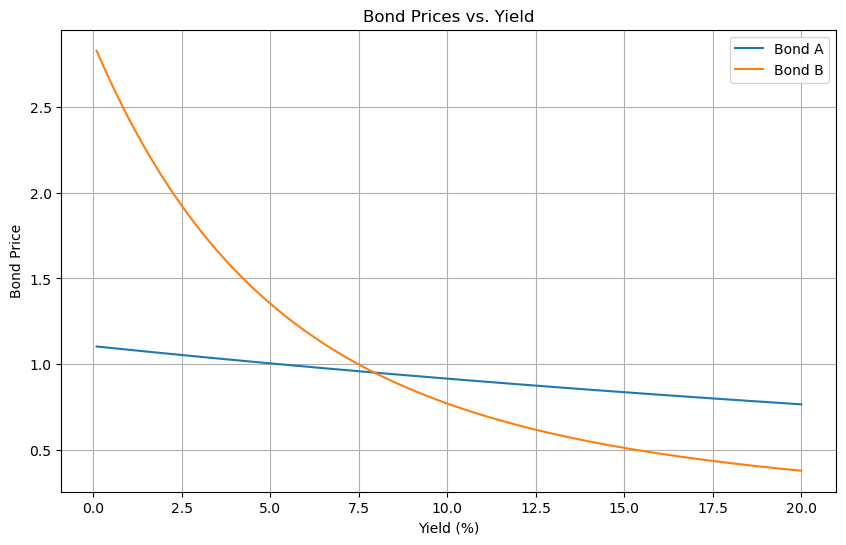

In [24]:
import matplotlib.pyplot as plt

par_value_a = 1.0
coupon_rate_a = 0.053
years_to_maturity_a = 2
payment_frequency_a = 2  

par_value_b = 1.0
coupon_rate_b = 0.075  
years_to_maturity_b = 25
payment_frequency_b = 2  

yields = np.linspace(0.001, 0.20, 1000)  

price_a = []
price_b = []

for yield_rate in yields:
    pv_a = 0
    pv_b = 0
    for t in range(1, years_to_maturity_a * payment_frequency_a + 1):
        pv_a += (par_value_a * coupon_rate_a / payment_frequency_a) / (1 + yield_rate / payment_frequency_a) ** t
    pv_a += (par_value_a / (1 + yield_rate / payment_frequency_a) ** (years_to_maturity_a * payment_frequency_a))
    price_a.append(pv_a)

    for t in range(1, years_to_maturity_b * payment_frequency_b + 1):
        pv_b += (par_value_b * coupon_rate_b / payment_frequency_b) / (1 + yield_rate / payment_frequency_b) ** t
    pv_b += (par_value_b / (1 + yield_rate / payment_frequency_b) ** (years_to_maturity_b * payment_frequency_b))
    price_b.append(pv_b)

plt.figure(figsize=(10, 6))
plt.plot(yields * 100, price_a, label='Bond A')
plt.plot(yields * 100, price_b, label='Bond B')
plt.xlabel('Yield (%)')
plt.ylabel('Bond Price')
plt.title('Bond Prices vs. Yield')
plt.legend()
plt.grid(True)
plt.show()


As bond price decreases, the yield increase. The decrease in price of a shorter term duration bond is slower than that of a longer duration bond (as yield increases). Also, the 25 year bond is more convex. 

# 6. Mortgage

# Payment

In [25]:
i = interest.annual_to_mthly(0.07,12)/12
n = 30*12
L = 250000

p = L/interest.annuity(n,i)
p

1627.3115774997489

# Plot interest and principal

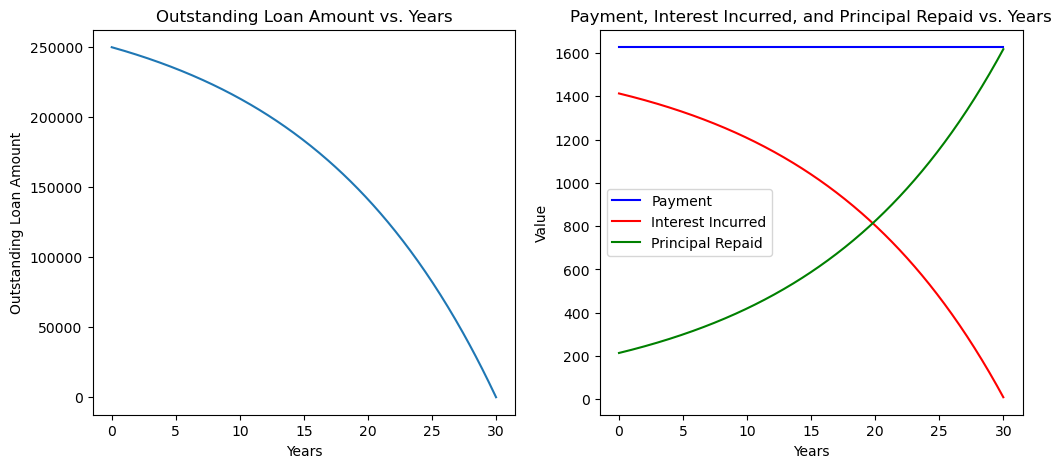

In [26]:
outstandingList = []
intIncurredList = []
prinRepaidList = []
paymentList = []
outs1 = 250000 
for index in range(1,n+1):
    outs2 = outs1*(1+i) - p
    prinRep = outs1 - outs2
    intInc = outs1*i
    outs1 = outs2
    outstandingList.append(outs2)
    intIncurredList.append(intInc)
    prinRepaidList.append(prinRep)
    paymentList.append(p)

plt.figure(figsize=(12, 5))  # Adjust the figure size
plt.subplot(1, 2, 1)  
plt.plot(np.linspace(0, 30, 360), outstandingList)
plt.xlabel('Years')
plt.ylabel('Outstanding Loan Amount')
plt.title('Outstanding Loan Amount vs. Years')

plt.subplot(1, 2, 2)  
years = np.linspace(0, 30, 360)
plt.plot(years, paymentList, label='Payment', color='blue')
plt.plot(years, intIncurredList, label='Interest Incurred', color='red')
plt.plot(years, prinRepaidList, label='Principal Repaid', color='green')

plt.xlabel('Years')
plt.ylabel('Value')
plt.title('Payment, Interest Incurred, and Principal Repaid vs. Years')
plt.legend()

plt.show()


From the first, we can see that the rate of decrease accelerates as more portion of each payment goes toward the principal (instead of paying for interest). The idea is illustrated more clearly in the 2nd plot

# Plot Payment against Rate

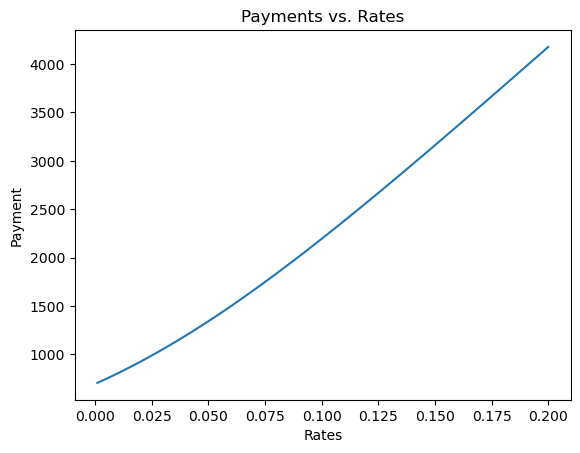

In [27]:
n = 30*12
L = 250000
r = np.linspace(0.001,0.2,10000)
paymentList = []

for i in range(len(r)):
    p = L/interest.annuity(n,r[i]/12)
    paymentList.append(p)

plt.plot(r, paymentList)
plt.xlabel('Rates')
plt.ylabel('Payment')
plt.title('Payments vs. Rates')
plt.show()

As the annual effective mortgage rate increases, the payment increases at an increasing rate untill around 10%. After that, it conitnues to increase with a linear trend.